In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
data = sns.load_dataset("titanic")
# data.head()

In [8]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
features=["pclass","sex","fare","embarked","age"];
target = ["survived"]

In [10]:
from sklearn.impute import SimpleImputer
imp_med = SimpleImputer(strategy="median")
data[["age"]] = imp_med.fit_transform(data[["age"]])

imp_freq = SimpleImputer(strategy="most_frequent")
data[["embarked"]] = imp_freq.fit_transform(data[["embarked"]])


In [11]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [12]:
from sklearn.preprocessing import LabelEncoder;

le = LabelEncoder()
data["sex"]= le.fit_transform(data["sex"]);
data["embarked"]= le.fit_transform(data["embarked"]);

In [13]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True


In [14]:
X= data[features];
Y = data[target];


In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

In [17]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print("accuracy:",accuracy_score(y_test,y_pred));
print("Testing accuracy",accuracy_score(y_train,y_pred_train))

accuracy: 0.752542372881356
Testing accuracy 0.9781879194630873


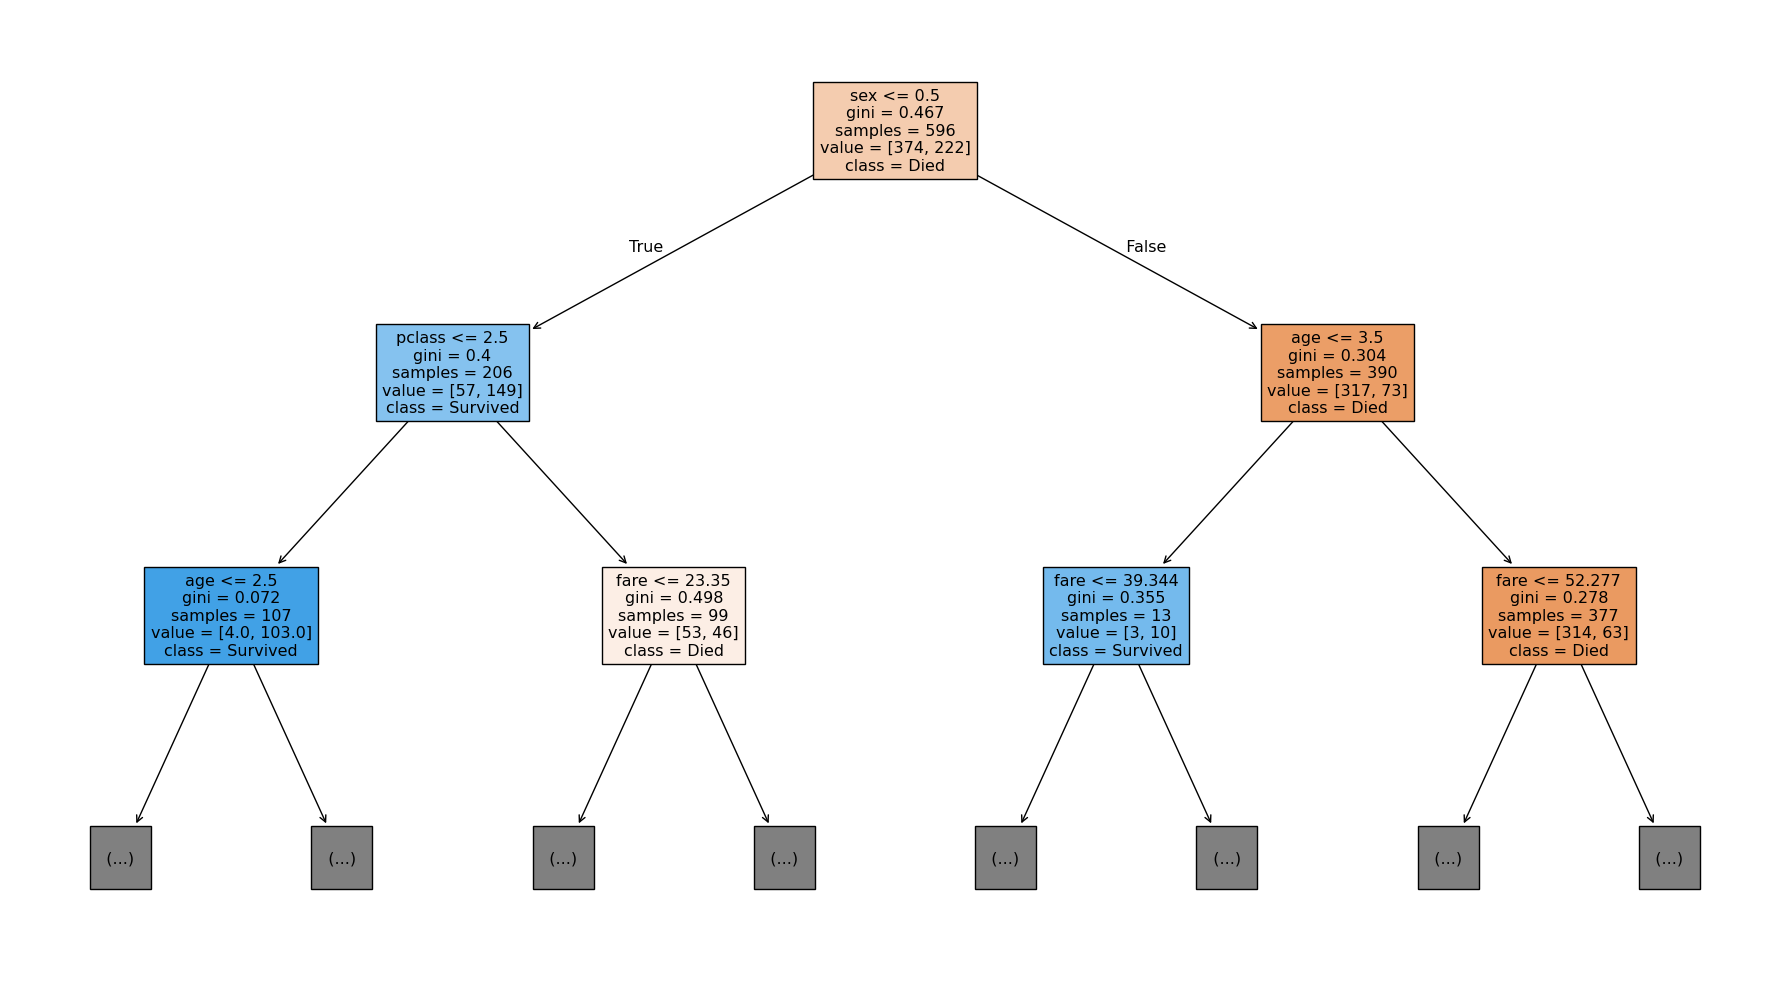

In [39]:
#Plot Tree
from sklearn.tree import plot_tree
plt.figure(figsize=(18,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=["Died","Survived"],
    filled=True,
    max_depth=2
)
plt.tight_layout();
plt.show()

# Decision Tree with pre-pruning

for depth=2, accuracy=0.7762711864406779
for depth=3, accuracy=0.8169491525423729
for depth=4, accuracy=0.8101694915254237


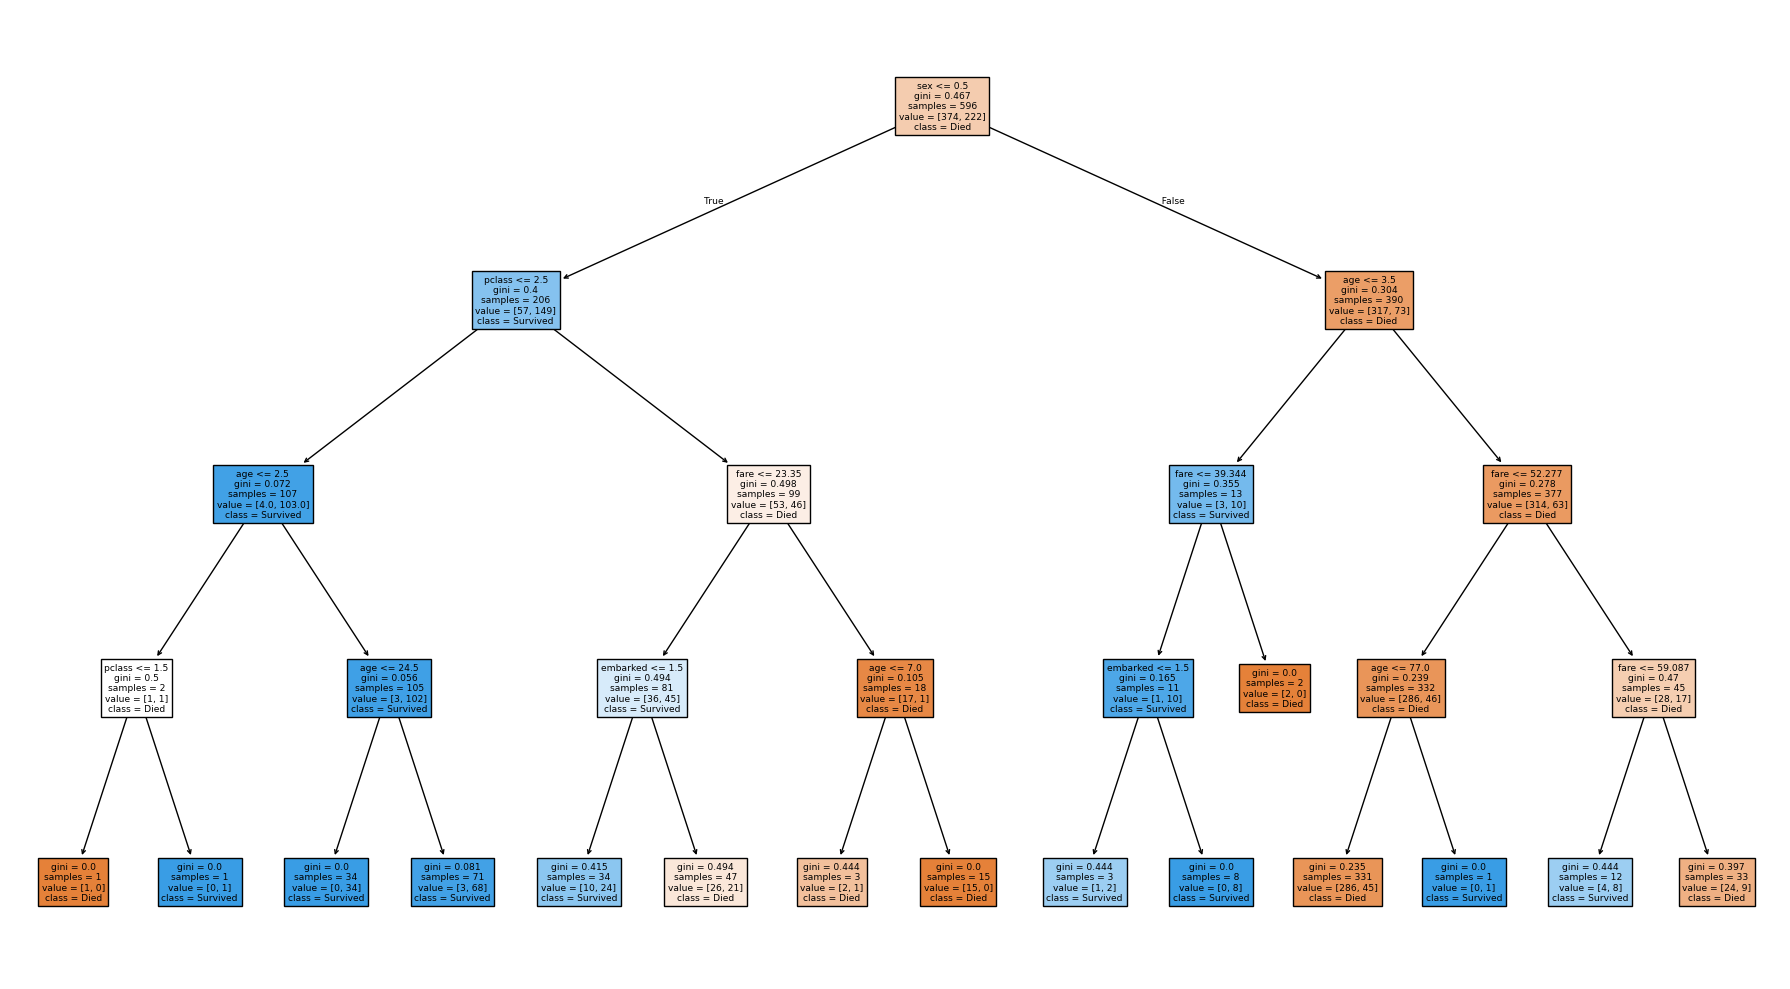

for depth=5, accuracy=0.7762711864406779
for depth=6, accuracy=0.8033898305084746
for depth=7, accuracy=0.8135593220338984
for depth=8, accuracy=0.8135593220338984
for depth=9, accuracy=0.7830508474576271
for depth=10, accuracy=0.7694915254237288


In [40]:
max_depths = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)

    acc = model.score(X_test, y_test)
    print(f"for depth={depth}, accuracy={acc}")

    if depth==4:
        plt.figure(figsize=(18, 10))
        plot_tree(
            model,
            feature_names=X.columns,
            class_names=["Died", "Survived"],
            filled=True
        )
        
        plt.tight_layout()
        plt.show()

for sample split=5, accuracy=0.8101694915254237
for sample split=10, accuracy=0.8101694915254237


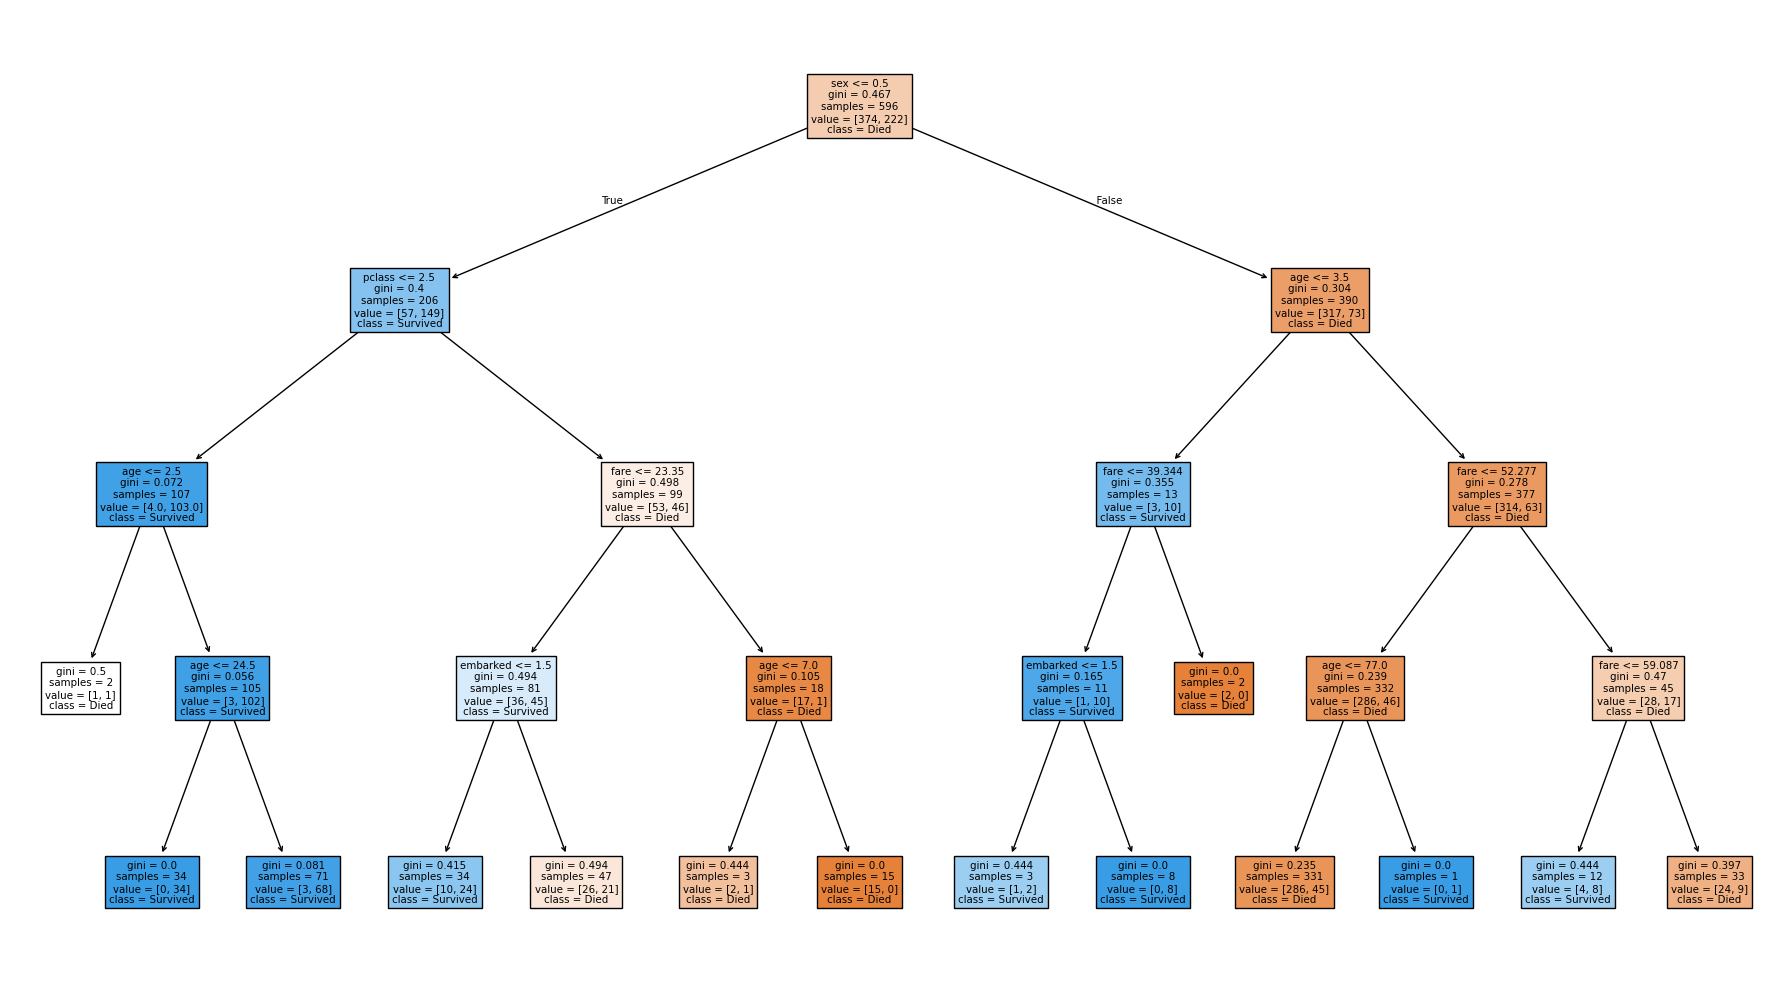

for sample split=15, accuracy=0.8101694915254237
for sample split=20, accuracy=0.8101694915254237
for sample split=25, accuracy=0.8101694915254237
for sample split=30, accuracy=0.8101694915254237


In [41]:
min_samples_splits = [5, 10, 15, 20, 25, 30]

for split in min_samples_splits:
    model = DecisionTreeClassifier(max_depth=4, min_samples_split=split)
    model.fit(X_train, y_train)

    acc = model.score(X_test, y_test)
    print(f"for sample split={split}, accuracy={acc}")

    if split==10:
        plt.figure(figsize=(18, 10))
        plot_tree(
            model,
            feature_names=X.columns,
            class_names=["Died", "Survived"],
            filled=True
        )
        
        plt.tight_layout()
        plt.show()

 # Decision Tree with pre-pruning

In [42]:
full_tree = DecisionTreeClassifier(random_state=42)
full_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [43]:
path = full_tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

print(ccp_alphas)

[0.         0.         0.         0.00013982 0.00021306 0.00027117
 0.00050336 0.00055928 0.00055928 0.00055928 0.00065516 0.00067114
 0.00081229 0.00089485 0.00100671 0.00100671 0.0010213  0.001044
 0.0010597  0.00110187 0.00111857 0.00111857 0.00112639 0.00114187
 0.00121178 0.00128803 0.00134228 0.00137279 0.001382   0.00138238
 0.00139821 0.00143634 0.00143981 0.00146372 0.00147116 0.00152532
 0.00157299 0.00158464 0.00160257 0.00161332 0.00170022 0.00178971
 0.0017977  0.00191755 0.00193053 0.00194534 0.00205918 0.00209732
 0.00223714 0.0022651  0.00244051 0.00292862 0.00302013 0.003204
 0.00465287 0.00469329 0.00472946 0.0059315  0.00761028 0.01235509
 0.01528878 0.04279002 0.13001568]


In [44]:
# train our model for all alphas

trees = []

for alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    model.fit(X_train, y_train)

    trees.append((model, alpha))

In [45]:
best_acc = 0
best_alpha = 0

for model, alpha in trees:
    curr_acc = model.score(X_test, y_test)
    if curr_acc > best_acc:
        best_acc = curr_acc
        best_alpha = alpha

best_acc

0.823728813559322

In [46]:
best_model = DecisionTreeClassifier(ccp_alpha=best_alpha, max_depth=4)
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0017897091722595083), max_depth=4)

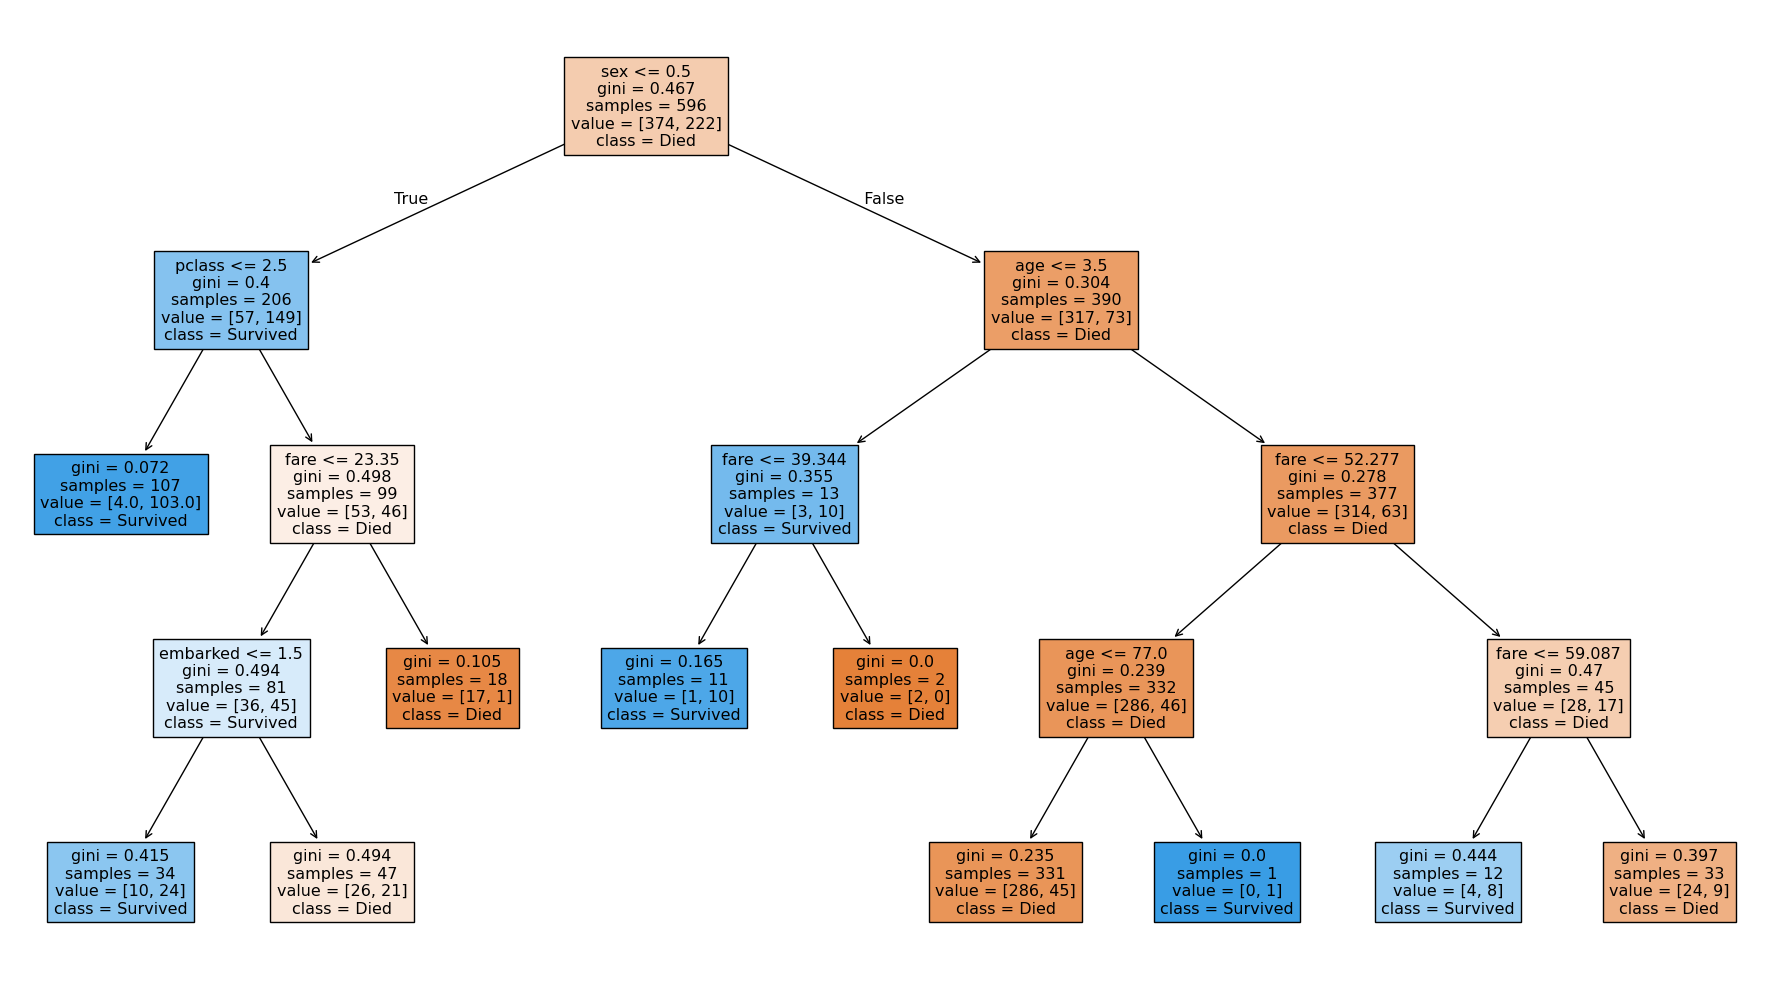

0.8101694915254237


In [47]:
plt.figure(figsize=(18, 10))
plot_tree(
    best_model,
    feature_names=X.columns,
    class_names=["Died", "Survived"],
    filled=True
)
        
plt.tight_layout()
plt.show()
print(best_model.score(X_test, y_test))